# Brief theory

We will be dealing with the discrete optimal transportation problem

\begin{align}
    \label{OT}
    f(X)&=\langle C, X\rangle \rightarrow \min_{X \in U(p, c)},
    \\
    U(p,c)&=\{X\in \mathbb{R}^{n\times n}_+: X\mathbf{1}=p, X^T\mathbf{1}=c\nonumber\},
\end{align}
$ \langle A,B\rangle $ denotes the Frobenius product of matrices defined as $\langle A,B\rangle=\sum\limits_{i,j=1}^n A_{ij}B_{ij}.$
Here

$X$ is the transportation plan and $X_{ij}$ describes how much product we should transport from producer $i$ to consumer $j$,

$C\in\mathbb{R}^{n\times n}_+$ is a given cost matrix, $C_{ij}$ describes how much it costs,

$p,c\in \mathbb{R}^n$ are given elements of the probability simplex. This assumption easilly fulfilled by normalization. $p_i$ describes amount of products producer $i$ can provide.


Summing along rows of $X$ gives $p$, along columns gives $q$.

Form two discrete random measures with support $\subset \{1, \dots, n\}$

# Example

In [1]:
from mnist import MNIST
import numpy as np
from scipy.spatial.distance import cdist
import cv2
import math
import time
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)

In [2]:
n=3 #size of p and q

(0, 1)

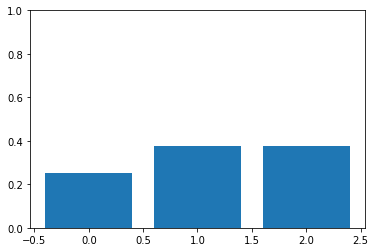

In [17]:
produced_max = 10
p=np.random.randint(produced_max, size=n)
p = np.array(p, dtype=np.float64)/p.sum()
plt.bar(np.arange(n), p , align='center', alpha=1)
plt.ylim(0,1)

(0, 1)

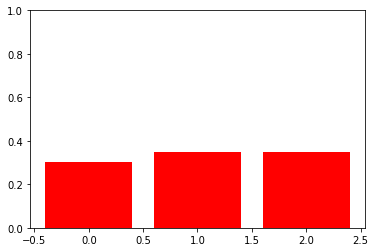

In [18]:
consumed_max = 10
c=np.random.randint(produced_max, size=n)
c = np.array(c, dtype=np.float64)/c.sum()
plt.bar(np.arange(n), c, align='center', alpha=1, color='r')
plt.ylim(0,1)

In [19]:
print(c.sum(), p.sum())

1.0 1.0


Generate simple cost matrix

In [20]:
C = np.zeros([n,n], dtype=np.float64)
for i in range(n):
    for j in range(n):
        C[i,j] = abs(i-j)

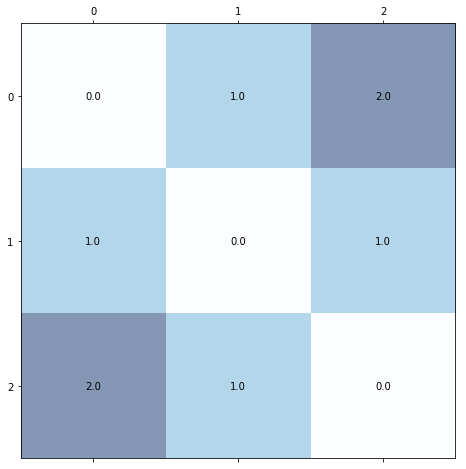

In [21]:
plt.rcParams["figure.figsize"] = (8,8)
fig, ax = plt.subplots()
min_val, max_val = 0, C.max()
intersection_matrix = np.round(C,2)
ax.matshow(intersection_matrix, cmap=plt.cm.Blues, alpha=0.5)
for i in np.arange(n):
    for j in np.arange(n):
        im = intersection_matrix[j,i]
        ax.text(i, j, str(im), va='center', ha='center')

In [23]:
import cvxpy as cp

one = np.ones(n, np.float64)

X = cp.Variable([n,n], pos=True)

constraints = [X@one == p] + [X.T@one == c]

#with only atomic cvxpy functions!
expression = cp.sum(cp.multiply(X,C))
objective = cp.Minimize(expression)

prob = cp.Problem(objective, constraints)

prob.solve()

0.08151366544315172

In [24]:
(C*X.value).sum()

0.08151770146559308

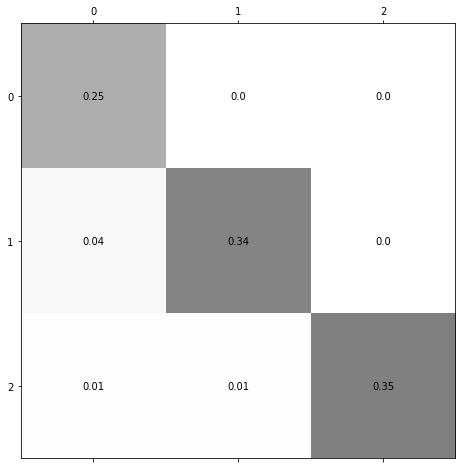

In [25]:
fig, ax = plt.subplots()
min_val, max_val = 0, X.value.max()
intersection_matrix = np.round(X.value,2)
ax.matshow(intersection_matrix, cmap=plt.cm.Greys, alpha=0.5)
for i in np.arange(n):
    for j in np.arange(n):
        im = intersection_matrix[j,i]
        ax.text(i, j, str(im), va='center', ha='center')

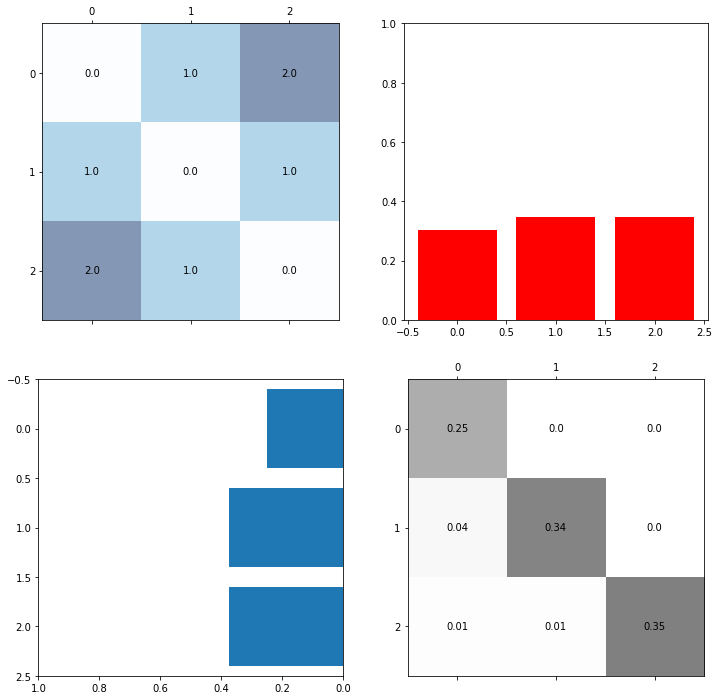

In [26]:
plt.rcParams["figure.figsize"] = (12,12)

fig, ((ax1, ax2), (ax3, ax)) = plt.subplots(2, 2)

ax2.bar(np.arange(n), c , align='center', alpha=1, color='r')
ax2.set_ylim(0,1)

ax3.barh((np.arange(n)), p , align='center', alpha=1)
ax3.set_xlim(1,0)
ax3.set_ylim(2.5,-0.5)

min_val, max_val = 0, X.value.max()
intersection_matrix = np.round(X.value,2)
ax.matshow(intersection_matrix, cmap=plt.cm.Greys, alpha=0.5)
for i in np.arange(n):
    for j in np.arange(n):
        im = intersection_matrix[j,i]
        ax.text(i, j, str(im), va='center', ha='center')
        


min_val, max_val = 0, C.max()
intersection_matrix = np.round(C,2)
ax1.matshow(intersection_matrix, cmap=plt.cm.Blues, alpha=0.5)
for i in np.arange(n):
    for j in np.arange(n):
        im = intersection_matrix[j,i]
        ax1.text(i, j, str(im), va='center', ha='center')       

# Discretization of continuous measures

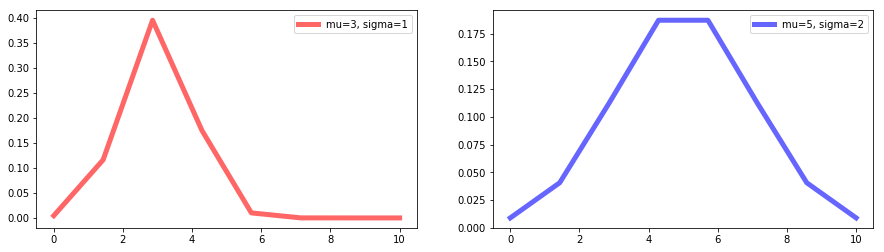

In [12]:
plt.rcParams["figure.figsize"] = (15,4)
from scipy.stats import norm
fig, (ax1, ax2) = plt.subplots(1, 2)


x1 = np.linspace(0, 10, 8)
p = norm(3,1).pdf(x1)
x2 = np.linspace(0, 10, 8)
c = norm(5,2).pdf(x2)

ax1.plot(x1, p, 'r-', lw=5, alpha=0.6, label='mu=3, sigma=1')
ax2.plot(x2, c, 'b-', lw=5, alpha=0.6, label='mu=5, sigma=2')
leg = ax1.legend();
leg = ax2.legend();


In [13]:
p = p/p.sum()
c = c/c.sum()
print(p.sum(), c.sum())

1.0 0.9999999999999999


In [14]:
C = np.zeros([len(x1),len(x2)], dtype=np.float64)
for i in range(len(x1)):
    for j in range(len(x2)):
        C[i,j] = abs(i-j)

In [15]:
one2 = np.ones(len(x1), np.float64)
one1 = np.ones(len(x2), np.float64)


import cvxpy as cp
X = cp.Variable([len(x1),len(x2)], pos=True)

constraints = [X@one1 == p] + [X.T@one2 == c] 
objective = cp.Minimize(cp.sum(cp.multiply(X,C)))

prob = cp.Problem(objective, constraints)

prob.solve()

1.4129876382007045

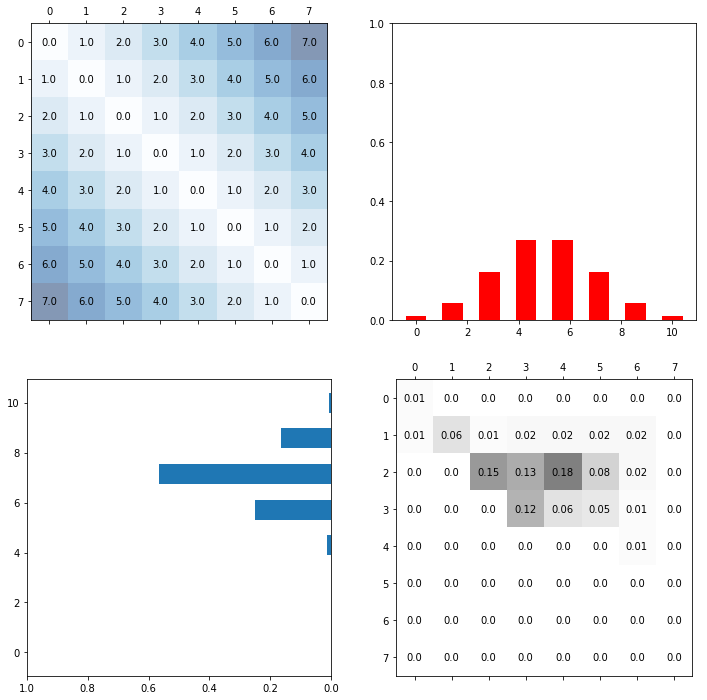

In [16]:
plt.rcParams["figure.figsize"] = (12,12)

fig, ((ax1, ax2), (ax3, ax)) = plt.subplots(2, 2)

ax2.bar(x1, c , align='center', alpha=1, color='r')
ax2.set_ylim(0,1)

ax3.barh(np.flip(x2), p , align='center', alpha=1)
ax3.set_xlim(1,0)

min_val, max_val = 0, X.value.max()
intersection_matrix = np.round(X.value,2)
ax.matshow(intersection_matrix, cmap=plt.cm.Greys, alpha=0.5)
for i in np.arange(len(x1)):
    for j in np.arange(len(x2)):
        im = intersection_matrix[j,i]
        ax.text(i, j, str(im), va='center', ha='center')

min_val, max_val = 0, C.max()
intersection_matrix = np.round(C,2)
ax1.matshow(intersection_matrix, cmap=plt.cm.Blues, alpha=0.5)
for i in np.arange(len(x1)):
    for j in np.arange(len(x2)):
        im = intersection_matrix[j,i]
        ax1.text(i, j, str(im), va='center', ha='center')      

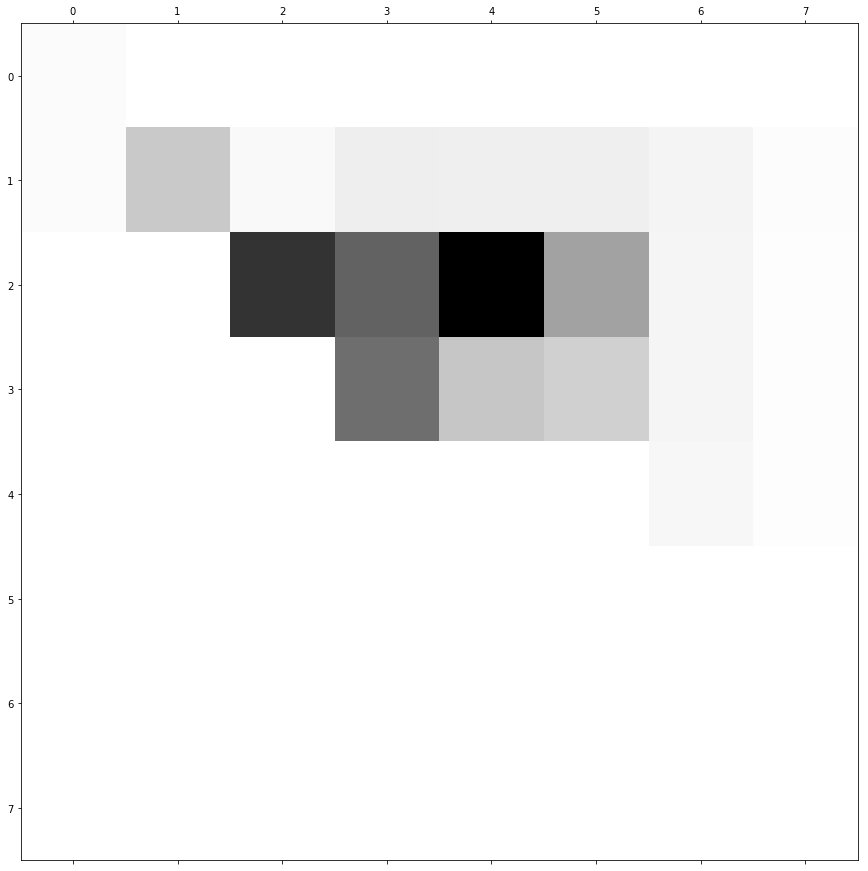

In [17]:
plt.rcParams["figure.figsize"] = (15,15)
plt.matshow(X.value, cmap=plt.cm.Greys)

Next we move closer to the real application. It's about when producers and consumer located in some city, and we need to distribute some products from one to another.

In this case measures $p$ and $c$ has 2-d support.

In in order to apply developed theory, we firstly need to transform $p$ and $c$ s.t. they have 1-d support.

# MNIST dataset

Next we continue with gray images.
Let 2d-array $P$ be an image, so $P_{ij}$ describes brightness or  intensity of $ij$ pixel.

But we need transform a picture to a stochastic measure in order to fulfill problem staement.



In [18]:
# https://pypi.org/project/python-mnist
mndata = MNIST('./python-mnist/data')
images_all, labels_all = mndata.load_training()

In [19]:
images_all = np.array(images_all)
images = images_all

Images already stores as vectors:

In [20]:
images[0].shape

(784,)

Reshape and plot some images

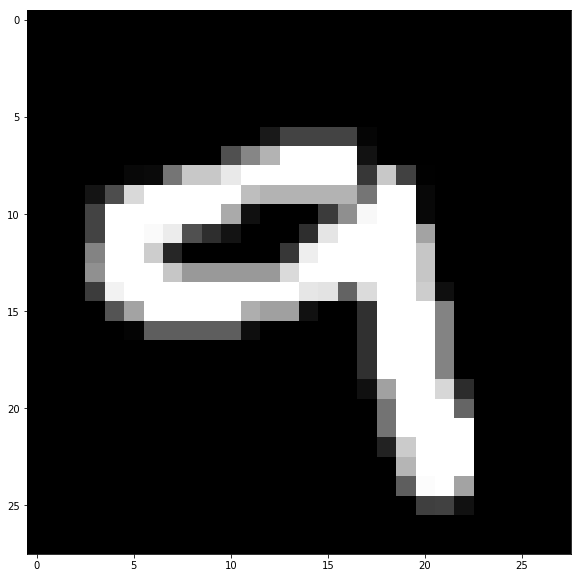

In [21]:
l = len(images)
_n = len(images[0])
_side_size = int(np.sqrt(_n))

from IPython.display import clear_output
plt.rcParams["figure.figsize"] = (10,10)
for i in np.random.randint(l, size=30):
    plt.imshow(images[i].reshape(-1, _side_size), cmap=plt.get_cmap('gray'))
    plt.show()
    clear_output(wait = True)

But firstly, let's practise with small images.

The following function does image reshaping and normalization, that problem statement requires.

In [22]:
side_size = int(_side_size/8) 
n=side_size*side_size

def generate_img(i, m):
    p = np.float64(images[i])
    p = cv2.resize(p.reshape(-1, _side_size), (m, m))
    p = p.reshape(-1)
    return p / sum(p)

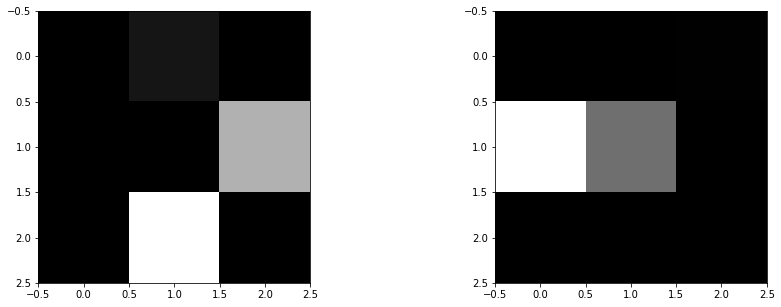

In [23]:
p, c = generate_img(1, side_size), generate_img(2, side_size)

plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(121)
plt.imshow(p.reshape(-1, side_size), cmap=plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow(c.reshape(-1, side_size), cmap=plt.get_cmap('gray'))

The following two functions alow to generate euclidean or Manhattan cost matrix 

In [24]:
def cartesian_product(*arrays):
    la = len(arrays)
    dtype = np.result_type(*arrays)
    arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(np.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

def generate_costs(m, metric='euclidean'):
    C = np.arange(m)
    C = cartesian_product(C, C)
    C = cdist(C, C, metric)
    return C

In [25]:
C = generate_costs(side_size, metric='cityblock')

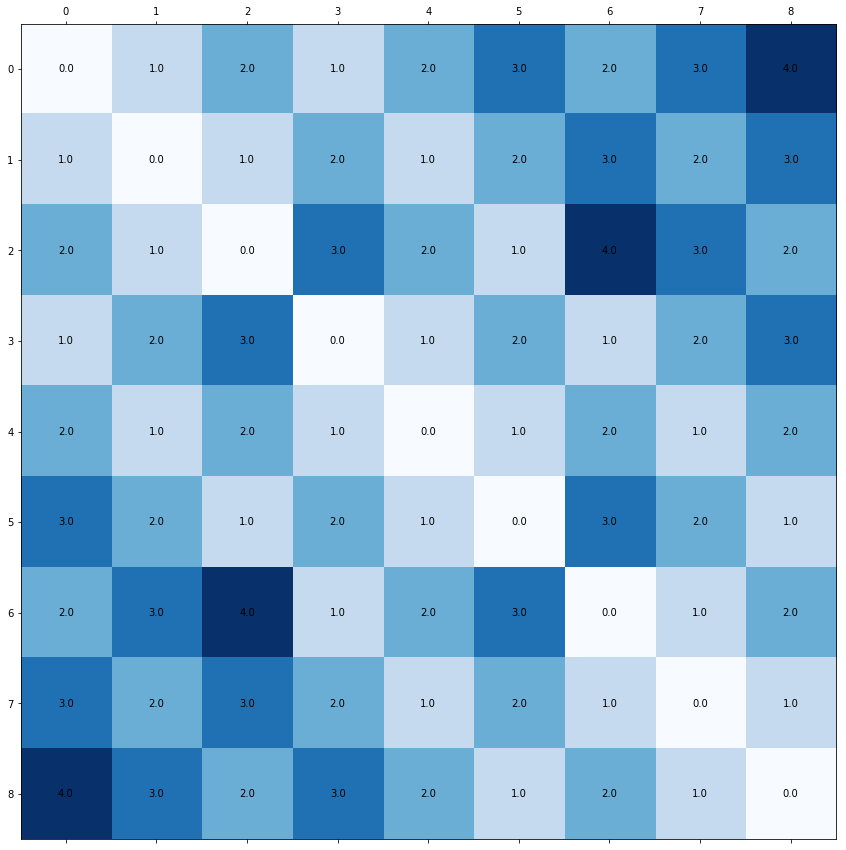

In [26]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()
min_val, max_val = 0, C.max()
intersection_matrix = np.round(C,2)
ax.matshow(intersection_matrix, cmap=plt.cm.Blues)
for i in np.arange(n):
    for j in np.arange(n):
        im = intersection_matrix[j,i]
        ax.text(i, j, str(im), va='center', ha='center')

Let's understand the structure of the matrix C

For doing this, form an array which entry consists of its indices

In [27]:
img = np.chararray((side_size,side_size), itemsize=3)
for i in np.arange(1,side_size+1):
    for j in np.arange(1, side_size+1):
        img[i-1,j-1]=str(i)+','+str(j)

Now we can see how reshape works

In [28]:
img.reshape(-1, n)

chararray([[b'1,1', b'1,2', b'1,3', b'2,1', b'2,2', b'2,3', b'3,1',
            b'3,2', b'3,3']], dtype='|S3')

So $ij$ entry of 2d array moves to $i*side\_size + j$ entry of 1d array.

Pick two random pair of indidces, the first is pair for $p$, the other for $c$

In [29]:
p_inds = np.random.randint(0, side_size, 2)
q_inds = np.random.randint(0, side_size, 2)

Find Euclidean distance between these two points

In [30]:
#dist = (p_inds[0] - q_inds[0])**2 + (p_inds[1] - q_inds[1])**2
#dist = np.sqrt(dist)

dist = abs(p_inds[0] - q_inds[0]) + abs(p_inds[1] - q_inds[1])

print(dist)

2


Look how it matches with the corresponding entry of $C$

In [31]:
C[p_inds[0]*side_size + p_inds[1], q_inds[0]*side_size + q_inds[1]]

2.0

Now let's solve our problem with cvxpy


In [32]:
one = np.ones(n, np.float64)

X = cp.Variable([n,n], pos=True)

constraints = [X@one == p] + [X.T@one == c] 
objective = cp.Minimize(cp.sum(cp.multiply(X,C)))

prob = cp.Problem(objective, constraints)

prob.solve()

1.6941746988178998

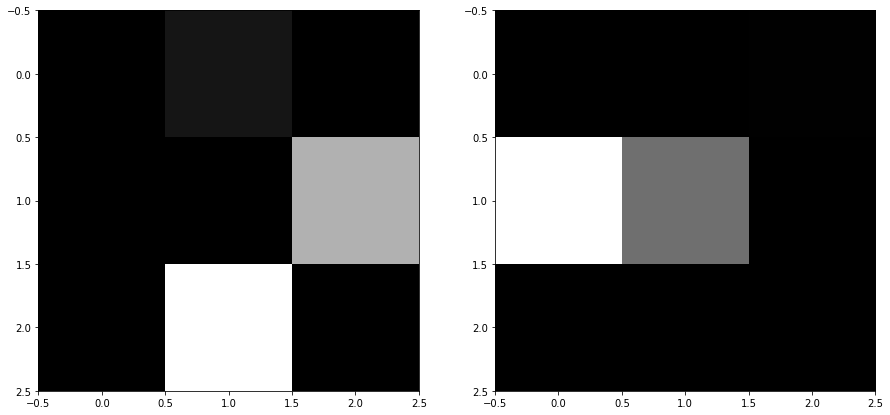

In [33]:
plt.subplot(121)
plt.imshow(X.value.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow((X.value).T.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))

In [34]:
# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(X.value)
print("A dual solution is")
print(prob.constraints[0].dual_value)
print("Constraint residual is")
print(prob.constraints[0].violation())


The optimal value is 1.6941746988178998
A solution x is
[[0.00000000e+00 0.00000000e+00 2.67463203e-07 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.75513856e-03 1.46276531e-02
  3.15219827e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.67463203e-07 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.67463203e-07 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.67463203e-07 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.59493194e-03 2.77926846e-01
  1.10697893e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.67463203e-07 0.00000000e+00
  0.00000000e+00 0.00000000e+

# Return to full-size image. Almost.

Сalculate OT distance for full size image is too long with cvxpy

In [35]:
side_size = int(_side_size/2) 
n=side_size*side_size
C=generate_costs(side_size, metric='cityblock')

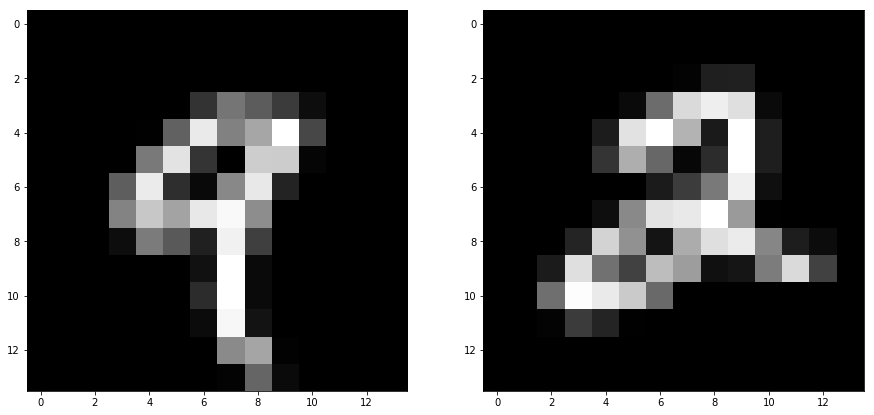

In [36]:
p, c = generate_img(4, side_size), generate_img(5, side_size)
plt.rcParams["figure.figsize"] = (15,15)
plt.subplot(121)
plt.imshow(p.reshape(-1, side_size), cmap=plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow(c.reshape(-1, side_size), cmap=plt.get_cmap('gray'))

In [37]:
one = np.ones(n, np.float64)

X = cp.Variable([n,n], pos=True)

constraints = [X@one == p] + [X.T@one == c] 
objective = cp.Minimize(cp.sum(cp.multiply(X,C)))

prob = cp.Problem(objective, constraints)

prob.solve()

1.5546151442368155

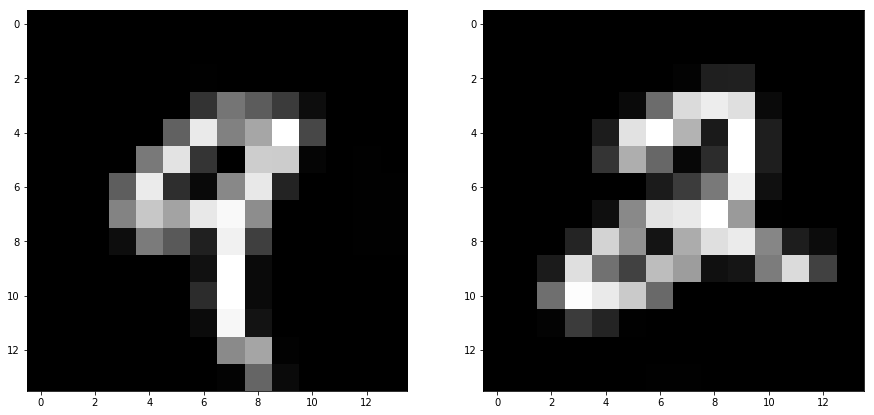

In [38]:
plt.subplot(121)
plt.imshow(X.value.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow((X.value).T.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))

Let's now calculate trasportation costs between the same digits

In [39]:
#chosing digit
digit = 1
labels = np.array(labels_all)
images = images_all[labels==digit]

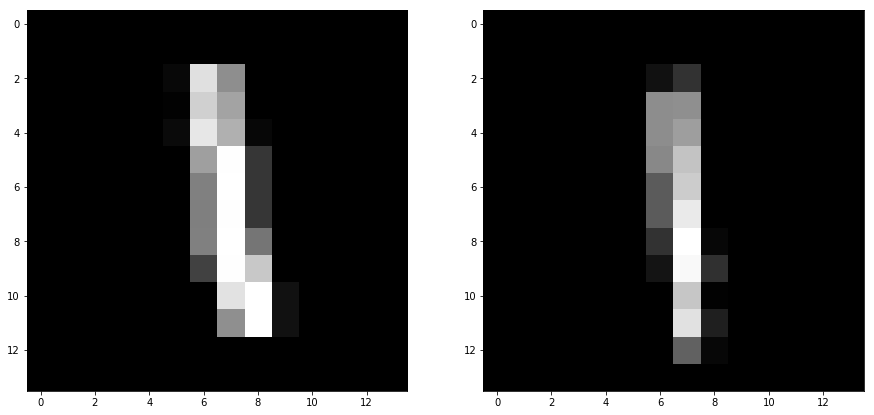

In [40]:
p, c = generate_img(1, side_size), generate_img(2, side_size)

plt.rcParams["figure.figsize"] = (15,15)
plt.subplot(121)
plt.imshow(p.reshape(-1, side_size), cmap=plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow(c.reshape(-1, side_size), cmap=plt.get_cmap('gray'))

In [41]:
constraints = [X@one == p] + [X.T@one == c]

prob = cp.Problem(objective, constraints)

prob.solve()

0.49729725477521636

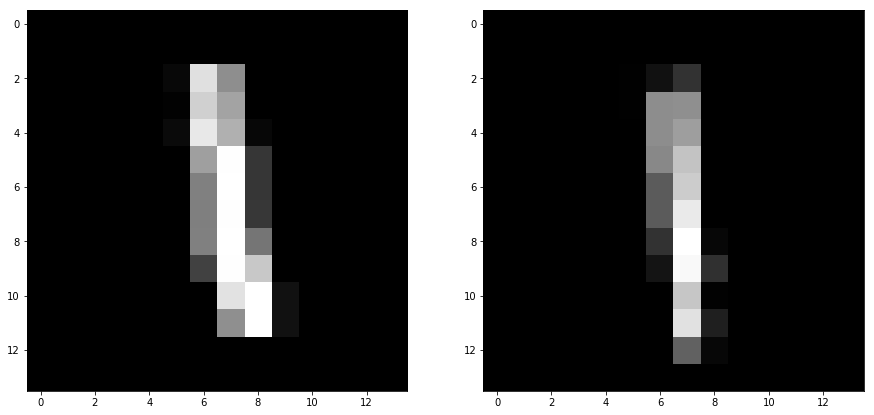

In [42]:
plt.subplot(121)
plt.imshow(X.value.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow((X.value).T.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))

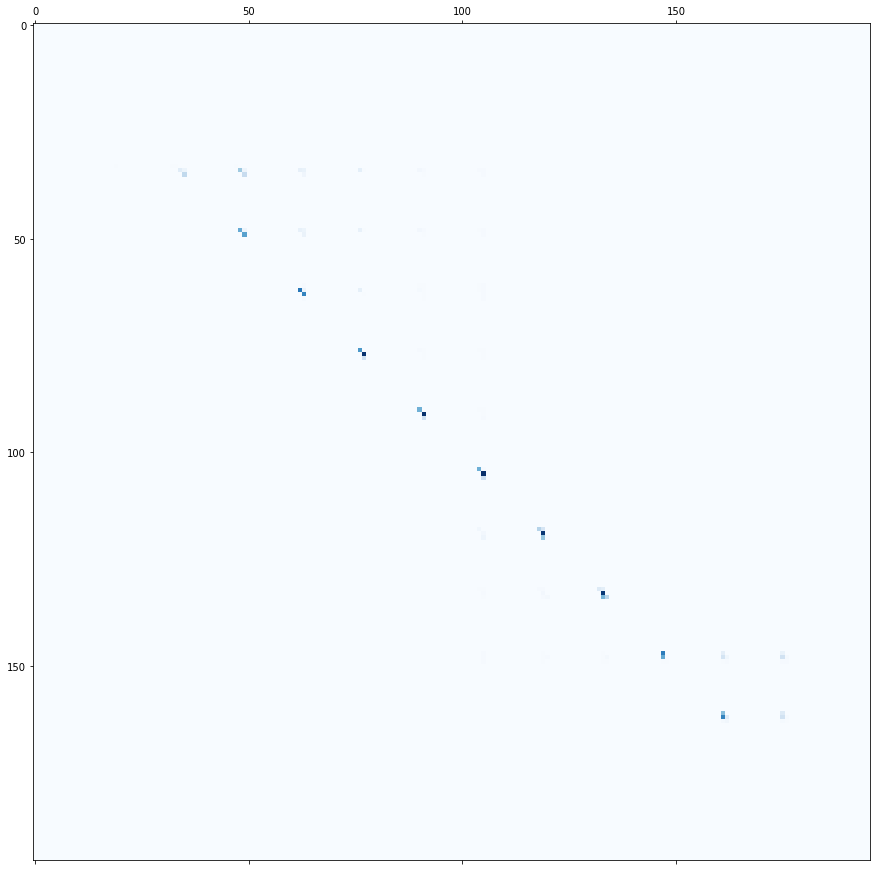

In [43]:
plt.matshow(X.value, cmap=plt.cm.Blues)

# Regularization

In [44]:
one = np.ones(n, np.float64)

X = cp.Variable([n,n], pos=True)

constraints = [X@one == p] + [X.T@one == c]
#objective = cp.Minimize(cp.sum(cp.multiply(X,C)) - cp.sum(cp.entr(X)))
objective = cp.Minimize(cp.sum(cp.multiply(X,C)) + cp.power(cp.norm(X, 'fro'), 2))

prob = cp.Problem(objective, constraints)

prob.solve()

0.536945643668993

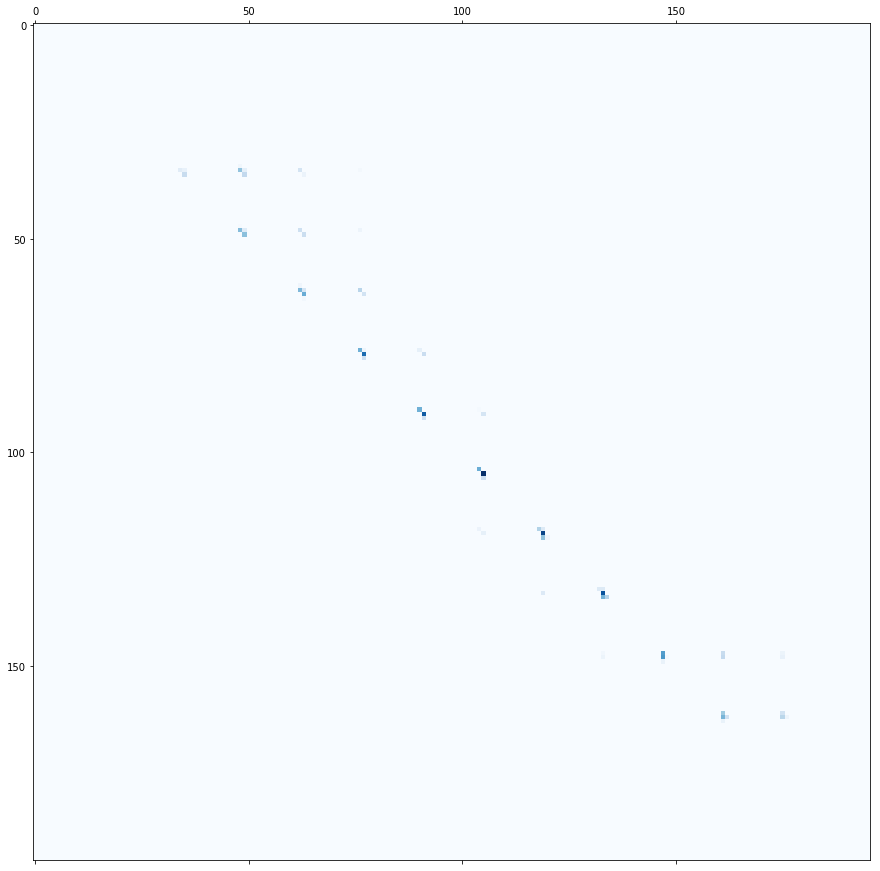

In [45]:
plt.matshow(X.value, cmap=plt.cm.Blues)

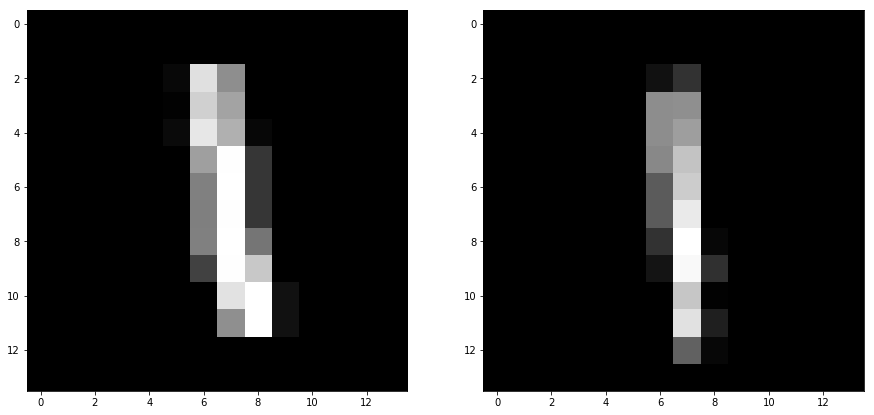

In [46]:
plt.subplot(121)
plt.imshow(X.value.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow((X.value).T.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))

# Sinkhorn's algorithm

In [47]:
def f_(gamma, x):
    y = (x.reshape(-1)).copy()
    y[x.reshape(-1) == 0.] = 1.
    y = y.reshape(n, -1)
    return (C * x).sum() + gamma * (x * np.log(y)).sum()

def B_(gamma, la, mu):
    B = np.exp((-C/gamma + np.outer(la, one) + np.outer(one, mu)))
    return B

def sinkhorn(gamma, stop_obj_val, stop_constr_res):
    u = np.zeros(n, np.float64)
    v = np.zeros(n, np.float64)
    k=0
    
    B = B_(gamma, u , v)
    while True:
        if k%2==0:
            u+=np.log(p) - np.log(B.dot(one))        
        else:
            v+=np.log(c) - np.log(B.T.dot(one))
        
        B = B_(gamma, u , v)
        B /= B.sum()
        if f_(gamma, B) < stop_obj_val and abs(B.dot(one)-p).sum() + abs(B.T.dot(one)-c).sum() < stop_constr_res:
            break
        k+=1
    return B

The algorithm calculates $log(p_i)$, so we need to ensure $p_i > 0$

In [48]:
p+=1e-5
p=p / p.sum()
c+=1e-5
c=c / c.sum()
print(p.sum(), c.sum())

1.0000000000000002 1.0000000000000002


Let's compare what is faster

In [49]:
gamma=0.1
C = generate_costs(side_size)

In [50]:
start_time = time.perf_counter()

constraints = [X@one == p] + [X.T@one == c] 
objective = cp.Minimize(cp.sum(cp.multiply(X,C)) - gamma*cp.sum(cp.entr(X)))
prob = cp.Problem(objective, constraints)
prob.solve()

cvxpy_time = time.perf_counter() - start_time

In [51]:
res = prob.constraints[0].violation().sum() + prob.constraints[1].violation().sum() 

start_time = time.perf_counter()
B = sinkhorn(gamma, prob.value, res)
sinkhorn_time = time.perf_counter() - start_time

In [52]:
print('cvxpy time:\t', cvxpy_time, '\t\tsinkhorn time:\t  ', sinkhorn_time)
print('cvxpy value:\t', prob.value, '\t\tsinkhorn value:\t  ', (B*C).sum())
print('cvxpy residual:\t', res, '\tsinkhorn residual:', abs(B.dot(one)-p).sum() + abs(B.T.dot(one)-c).sum())

cvxpy time:	 19.85644274399965 		sinkhorn time:	   17.21638626200729
cvxpy value:	 0.04881358904934075 		sinkhorn value:	   0.4202347840062207
cvxpy residual:	 1.2804258550310293e-05 	sinkhorn residual: 1.277192194150056e-05


# Wasserstein barycenters and entropic regularization

Given two probability measures $p, q \in S_n(1)$ and a cost matrix $C \in \mathbb{R}^{n \times n}$, we define entropy-regularized OT-distance for $\gamma \geq 0$:
\begin{equation}
    \mathcal{W}_\gamma(p,q) := \min_{\pi \in  \Pi(p,q)} \left\{ \langle \pi, C \rangle + \gamma H(\pi) \right\}.
\end{equation}

For $\gamma=0$, \mathcal{W}_\gamma(p,q) refers to a non-regularized distance.

For a given set of probability measures $\{p_1, \dots, p_m\}$ and cost matrices $C_1, \dots, C_m \in \mathbb{R}_+^{n \times n}$ we define their weighted regularized barycenter with weights $w \in S_{{m}}(1)$ as a solution of the following problem:}


\begin{align}
    &\min_{q \in S_n(1)} \sum_{l=1}^m w_l \mathcal{W}_\gamma(p_l, q)=
    \\
    & \min_{\substack{q \in S_n(1), \\ \pi_l \in \Pi(p_l, q),
    l = 1, \dots, m }} \sum_{l = 1}^m w_l \bigl\{\langle \pi_l, C_l \rangle + \gamma H(\pi_l) \bigr\} \notag
    \\ 
    & = \min_{\substack{  \pi_l \mathbb{1} = p_l,\; \pi_l^T \mathbb{1} = \pi_{l+1}^T \mathbb{1}, \\ \pi_l \in \mathbb{R}_+^{n \times n},\;
    l=1,\dots,m}} \sum_{l = 1}^m w_l \bigl\{\langle \pi_l, C_l \rangle + \gamma H(\pi_l) \bigr\}
\end{align}

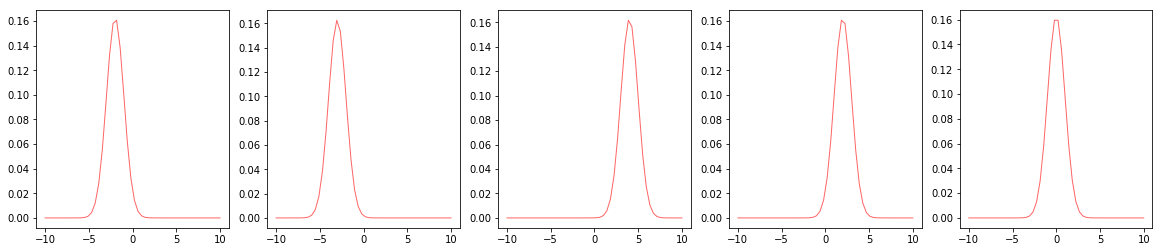

In [53]:
M=5
n=50

plt.rcParams["figure.figsize"] = (20,4)


fig, ax = plt.subplots(1, M)
x = np.linspace(-10, 10, n)
mu = np.random.randint(-5, 5, M)
sigma = np.ones(M)
#sigma = np.random.randint(1, 5, M)

p=[]
for i in range(M):
    tmp = norm(mu[i], sigma[i]).pdf(x)
    p.append(tmp/tmp.sum())
    ax[i].plot(x, p[i], 'r-', lw=1, alpha=0.6)

In [54]:
C = np.zeros([n,n], dtype=np.float64)
for i in range(n):
    for j in range(n):
        C[i,j] = abs(i-j)

one = np.ones(n, np.float64)

In [55]:
X=[]
constraints =[]

expression=0
for i in range(M):
    X.append(cp.Variable([n,n], pos=True))
    constraints += [X[i]@one == p[i]]
    expression=expression+cp.sum(cp.multiply(X[i], C))
    
regularization = True
if regularization:
    gamma=1
    for i in range(M):
        expression=expression-gamma*cp.sum(cp.entr(X[i]))
    
for i in range(M-1):
    constraints += [X[i].T@one == X[i+1].T@one]
    
objective = cp.Minimize(expression)
prob = cp.Problem(objective, constraints)
prob.solve()

4.164062210421286

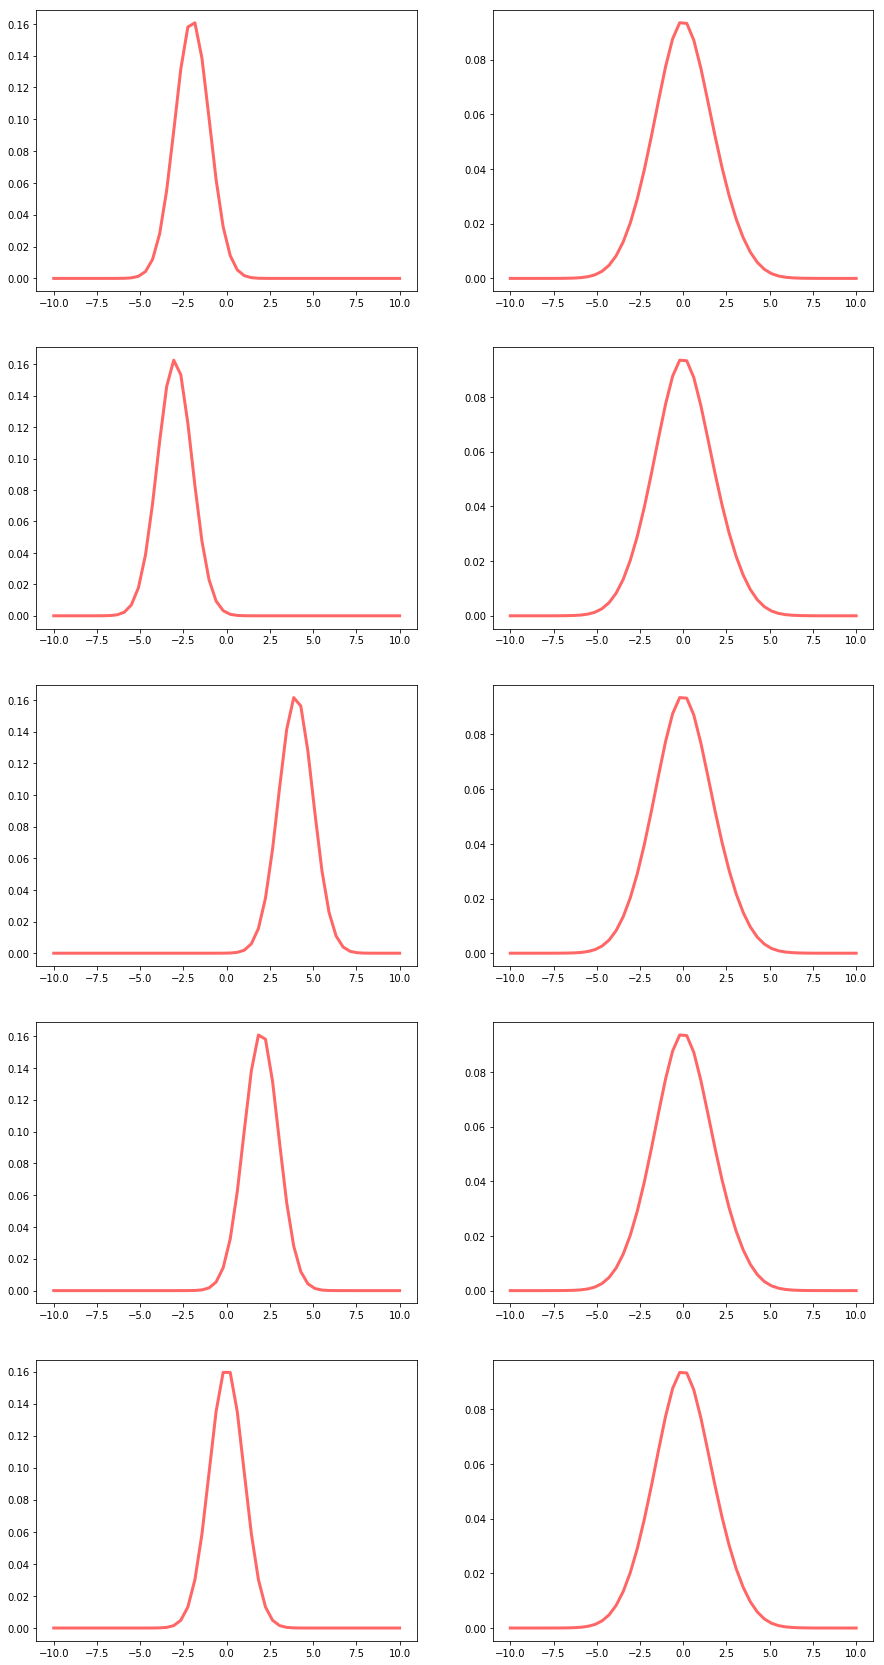

In [56]:
plt.rcParams["figure.figsize"] = (15,30)
fig, ax = plt.subplots(M, 2)
for i in range(M):
    ax[i][0].plot(x, X[i].value@one, 'r-', lw=3, alpha=0.6)
    ax[i][1].plot(x, X[i].value.T@one, 'r-', lw=3, alpha=0.6)

# Barycenters (MNIST)

In [57]:
#chosing digit
digit = 8
images = images_all[labels==digit]

p=[]
side_size=int(_side_size/2)
M=5
for i in np.random.randint(0,len(images), M):
        p.append(generate_img(i, side_size))

n=side_size**2
C =generate_costs(side_size)
one = np.ones(n, np.float64)

In [58]:
start_time = time.perf_counter()
X=[]

constraints =[]
expression=0
for i in range(M):
    X.append( cp.Variable( [n,n], pos=True))
    constraints += [X[i]@one == p[i]]
    expression=expression+cp.sum(cp.multiply(X[i], C))

for i in range(M-1):
    constraints += [X[i].T@one == X[i+1].T@one]
    
regularization = False
if regularization:
    gamma=1
    for i in range(M):
        expression=expression-gamma*cp.sum(cp.entr(X[i]))
    
objective = cp.Minimize(expression)
prob = cp.Problem(objective, constraints)
prob.solve()

cvxpy_time = time.perf_counter() - start_time

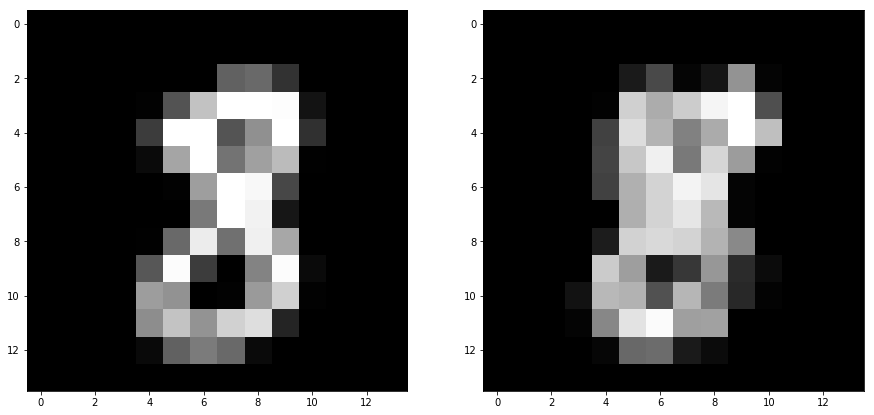

In [59]:
for i in range(M):
    plt.subplot(121)
    plt.imshow(X[i].value.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))
    plt.subplot(122)
    plt.imshow((X[i].value).T.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))
    plt.show()
    clear_output(wait = True)

# Iterative Bregman Projections

In [60]:
collect_stat = False
def f_(X):
    return np.einsum('k,kij,ij->', weights, X, C)

def f_true_(X):
    Y = X
    Y[X==0] = 1.
    return np.einsum('k,kij,ij->', weights, X, C) + gamma*np.einsum('k,kij,kij', weights, X, np.log(Y))

def phi_(u, v):
    return np.einsum('k,k', weights, np.log(np.einsum('ki,ij,kj->k', np.exp(u),K,np.exp(v))) - np.einsum('ki,ki->k', u, p))

def argmin_u_(u, v):
    #return np.log(p) - np.log(np.einsum('ki,ij,kj->ki', np.exp(u), K, np.exp(v)))
    return u + np.log(p) - np.log(np.einsum('ki,ij,kj->ki', np.exp(u), K, np.exp(v)))

def argmin_v_(u, v):
    return np.einsum('k,ki->i', weights, np.log(np.einsum('ij,ki->kj', K, np.exp(u)))) - np.log(np.einsum('ij,ki->kj', K, np.exp(u)))    

In [61]:
def update_progress(progress, info=''):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100) + '\n' + info
    print(text)

def IBP(eps):
    v = np.zeros([M,n], np.float64)
    u = np.zeros([M,n], np.float64)
    primal=np.zeros([M, n, n], np.float64)
    i=0
    accuracy = eps+1
    while accuracy > eps:
        if i%2 == 1:
            v=argmin_v_(u, v)
        else:
            u=argmin_u_(u, v)
        
        
        primal = np.einsum('ki,ij,kj->kij',np.exp(u),K,np.exp(v))
        primal = np.einsum('kij,k->kij', primal, 1/np.einsum('kij->k',primal))
        
        if i%2==0:
            BTone = np.einsum('kij->kj', primal)
            q = np.einsum('k,kj->j', weights, BTone)
            accuracy = np.einsum('k, kj->', weights, abs(BTone - q))
            update_progress(eps/accuracy, str(accuracy) + ' ' + str(eps))
            
        i+=1
    return primal

In [62]:
def generate_img(i, m):
    p = np.float64(images[i])
    #avoid null  entries
    p+=1e-5
    
    p = cv2.resize(p.reshape(-1, _side_size), (m, m))
    p = p.reshape(-1)
    return p / sum(p)

In [63]:
#chosing digit
digit = 8
images = images_all[labels==digit]

p=[]
side_size=int(_side_size)
M=10
for i in np.random.randint(0,len(images), M):
        p.append(generate_img(i, side_size))

n=side_size**2
C =generate_costs(side_size, metric='cityblock')
one = np.ones(n, np.float64)


eps = 3.12
gamma = eps/4/np.log(n)
epsprime = eps/4/C.max()
K = np.exp(-C/gamma)
weights = 1/M * np.ones(M, np.float64)

ibp_time = time.perf_counter()
B = IBP(epsprime)
ibp_time = time.perf_counter() - ibp_time

Progress: [####################] 100.0%
0.014435068463392554 0.014444444444444446


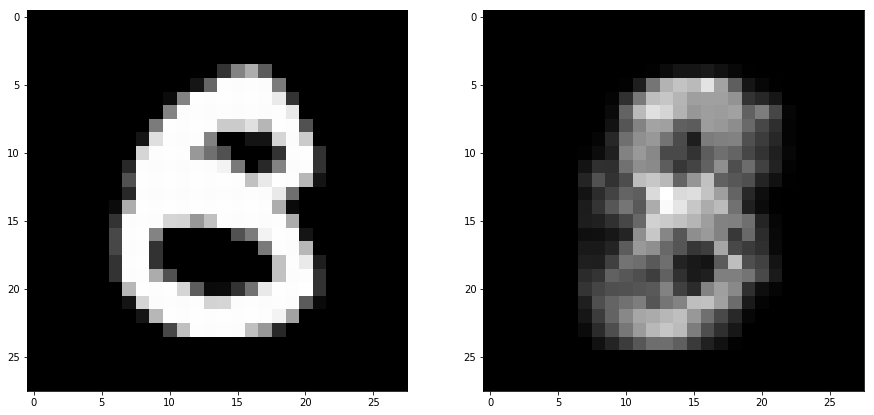

In [64]:
for i in range(M):
    plt.subplot(121)
    plt.imshow(B[i].dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))
    plt.subplot(122)
    plt.imshow((B[i]).T.dot(one).reshape(-1, side_size), cmap=plt.get_cmap('gray'))
    plt.show()
    clear_output(wait = True)

In [65]:
print('ibp time:\t', ibp_time)

ibp time:	 57.58758804599347
